In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# перед импортом библиотеки h2o убедитесь, что библиотека 
# h2o установлена (сначала установите Java SE Development Kit 
# и потом установите h2o с помощью pip install h2o)
import h2o
h2o.init(nthreads=-1, max_mem_size=8)
# включаем режим 'retina', если у вас экран Retina
%config InlineBackend.figure_format = 'retina'

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "17.0.6" 2023-01-17 LTS; Java(TM) SE Runtime Environment (build 17.0.6+9-LTS-190); Java HotSpot(TM) 64-Bit Server VM (build 17.0.6+9-LTS-190, mixed mode, sharing)
  Starting server from /Users/artemgruzdev/anaconda3/lib/python3.10/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/s3/pyzs_r116jl6svn81qxgz6gc0000gn/T/tmpt1rktu9b
  JVM stdout: /var/folders/s3/pyzs_r116jl6svn81qxgz6gc0000gn/T/tmpt1rktu9b/h2o_artemgruzdev_started_from_python.out
  JVM stderr: /var/folders/s3/pyzs_r116jl6svn81qxgz6gc0000gn/T/tmpt1rktu9b/h2o_artemgruzdev_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,Europe/Moscow
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.2
H2O_cluster_version_age:,29 days
H2O_cluster_name:,H2O_from_python_artemgruzdev_ty8ts5
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,8 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


In [2]:
# преобразовываем обучающий и тестовый наборы, 
# записанные в виде CSV-файлов, во фреймы, 
# переменную SeriousDlqin2yrs прочитаем 
# как категориальную
dct = {'SeriousDlqin2yrs': 'enum'}
h2o_train = h2o.upload_file(path='h2o_train.csv', col_types=dct) 
h2o_test = h2o.upload_file(path='h2o_test.csv', col_types=dct) 

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [3]:
# взглянем на обучающий фрейм, обратите внимание, сейчас
# метод .describe() – это метод h2o, а не pandas
h2o_train.describe()

Rows:105000
Cols:20

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Ratio,NumberOfOpenCreditLinesAndLoans_is_0,NumberRealEstateLoansOrLines_is_0,RevolvingUtilizationOfUnsecuredLines_is_0,NumberOfDependents + NumberOfTime30-59DaysPastDueNotWorse_interact,NumberOfTime60-89DaysPastDueNotWorse + NumberOfTimes90DaysLate_interact,NumberOfTime30-59DaysPastDueNotWorse + NumberOfTime60-89DaysPastDueNotWorse_interact,NumberRealEstateLoansOrLines_is_0 + NumberOfTimes90DaysLate_interact,NumberOfOpenCreditLinesAndLoans_is_0 + NumberOfTimes90DaysLate_interact
type,enum,real,int,enum,real,int,int,enum,int,enum,enum,real,enum,enum,enum,enum,enum,enum,enum,enum
mins,,0.0,18.0,,0.0,1200.0,0.0,,0.0,,,0.0,,,,,,,,
mean,,0.3206327133481704,52.34535238095235,,353.03667160200746,5642.451380952393,8.467161904761957,,1.019790476190479,,,0.036019239015444265,,,,,,,,
maxs,,1.99867586,109.0,,329664.0,3008750.0,58.0,,54.0,,,1.0,,,,,,,,
sigma,,0.3554694880582193,14.758781938901976,,2051.316137921959,14535.70282977496,5.166483069052758,,1.1342971896649554,,,0.16498295734325888,,,,,,,,
zeros,,7504,0,,2870,0,1315,,39247,,,99165,,,,,,,,
missing,0,241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0.719618958,78.0,cat_0,0.851276915,3993.0,19.0,cat_0,2.0,cat_0,cat_0.0,0.0,F,F,F,cat_0.0 + cat_0,cat_0 + cat_0,cat_0 + cat_0,F + cat_0,F + cat_0
1,0,0.470175827,49.0,cat_0,0.525397181,8937.0,24.0,cat_0,2.0,cat_0,cat_0.0,0.0,F,F,F,cat_0.0 + cat_0,cat_0 + cat_0,cat_0 + cat_0,F + cat_0,F + cat_0
2,0,0.140701431,69.0,cat_0,233.0,1200.0,10.0,cat_0,0.0,cat_0,cat_0.0,0.0,F,T,F,cat_0.0 + cat_0,cat_0 + cat_0,cat_0 + cat_0,T + cat_0,F + cat_0


In [4]:
# задаем название зависимой переменной
dependent = 'SeriousDlqin2yrs'
# задаем список названий предикторов
predictors = list(h2o_train.columns)
# удаляем название зависимой переменной 
# из списка названий предикторов
predictors.remove(dependent)

In [5]:
# импортируем класс H2OGeneralizedLinearEstimator
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
# создаем экземпляр класса H2OGeneralizedLinearEstimator
model = H2OGeneralizedLinearEstimator(family='binomial')
# обучаем модель
model.train(predictors, 
            dependent, 
            training_frame=h2o_train, 
            validation_frame=h2o_test);

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


In [6]:
# смотрим модель 
model

Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1680882913702_1


GLM Model: summary
    family    link    regularization                                 number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  ------  ---------------------------------------------  ----------------------------  -----------------------------  ----------------------  ------------------------------------------------------
    binomial  logit   Elastic Net (alpha = 0.5, lambda = 1.426E-4 )  128                           53                             5                       Key_Frame__upload_acff67a9a285c8813c71c884c0974068.hex

ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.04963392501963995
RMSE: 0.22278672541163658
LogLoss: 0.18041059392017514
AUC: 0.8617106416373846
AUCPR: 0.38543008588904115
Gini: 0.7234212832747693
Null degrees of freedom: 104999
Residual degrees of freedom: 104946
Null deviance: 51530.262138337675
Residual deviance: 37886.22472323678
AIC: 37994.22472323678

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.18441856362863776
       0      1     Error    Rate
-----  -----  ----  -------  -----------------
0      92024  5958  0.0608   (5958.0/97982.0)
1      3394   3624  0.4836   (3394.0/7018.0)
Total  95418  9582  0.0891   (9352.0/105000.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.184419     0.436627  212
max f2                       0.0933676    0.519807  268
max f0point5                 0.364811     0.450346  136
max accuracy                 0.502149     0.937229  90
max precision                0.882895     0.783784  7
max recall                   0.000978997  1         399
max specificity              0.998858     0.99999   0
max absolute_mcc             0.168632     0.395364  220
max min_per_class_accuracy   0.0583066    0.782317  303
max mean_per_class_accuracy  0.0543161    0.783135  308
max tns                      0.998858     97981     0
max fns                      0.998858     7018      0
max fps                      0.000978997  97982     399
max tps                      0.000978997  7018      399
max tnr                      0.998858     0.99999   0
max fnr                      0.998858     1         0
max fpr                      0.000978997  1         399
max tpr                      0.000978997  1         399

Gains/Lift Table: Avg response rate:  6,68 %, avg score:  6,68 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.01                        0.620512           9.46139    9.46139            0.632381         0.70817     0.632381                    0.70817             0.0946139       0.0946139                  846.139   846.139            0.0906744
2        0.02                        0.51011            8.4782     8.96979            0.566667         0.56081     0.599524                    0.63449             0.084782        0.179396                   747.82    796.979            0.170813
3        0.03                        0.429749           6.64007    8.19322            0.44381          0.468037    0.547619                    0.579006            0.0664007       0.245797                   564.007   719.322            0.231253
4        0.04                        0.371461           5.89912    7.61969            0.394286         0.

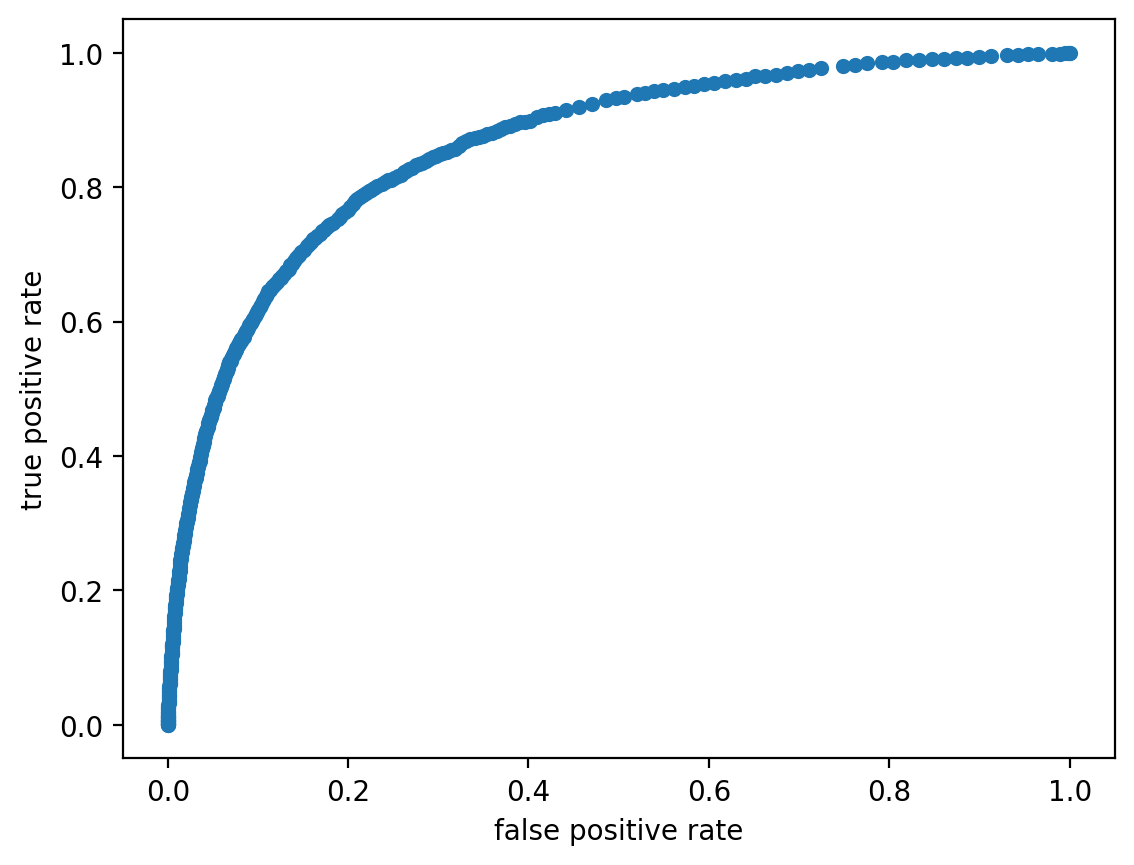

In [7]:
# выводим ROC-кривую для тестовой выборки
tmp = model.roc(valid=True)
df = pd.DataFrame({'false positive rate': tmp[0], 
                   'true positive rate': tmp[1]})
df.plot(kind='scatter', 
        x='false positive rate', 
        y='true positive rate');

In [8]:
# вычисляем AUC-ROC для тестовой выборки
model.auc(valid=True)

0.8613085979459613

In [9]:
# увеличиваем количество отображаемых строк
pd.set_option('display.max_rows', 500)
# увеличиваем максимальную ширину столбца
pd.set_option('display.max_colwidth', 100)

# записываем таблицу коэффициентов
coeff_table = model._model_json['output']['coefficients_table']

# преобразуем таблицу коэффициентов в датафрейм pandas
coeff_table.as_data_frame()

,names,coefficients,standardized_coefficients
0,Intercept,-1.627700,-1.418628
1,NumberOfDependents + NumberOfTime30-59DaysPastDueNotWorse_interact.cat_0.0 + cat_0,-0.153942,-0.153942
2,NumberOfDependents + NumberOfTime30-59DaysPastDueNotWorse_interact.cat_0.0 + cat_1,0.000000,0.000000
3,NumberOfDependents + NumberOfTime30-59DaysPastDueNotWorse_interact.cat_0.0 + cat_2,0.048483,0.048483
4,NumberOfDependents + NumberOfTime30-59DaysPastDueNotWorse_interact.cat_0.0 + cat_3,0.000000,0.000000
5,NumberOfDependents + NumberOfTime30-59DaysPastDueNotWorse_interact.cat_0.0 + cat_4,0.000000,0.000000
6,NumberOfDependents + NumberOfTime30-59DaysPastDueNotWorse_interact.cat_1.0 + cat_0,0.000000,0.000000
7,NumberOfDependents + NumberOfTime30-59DaysPastDueNotWorse_interact.cat_1.0 + cat_1,-0.008245,-0.008245
8,NumberOfDependents + NumberOfTime30-59DaysPastDueNotWorse_interact.cat_1.0 + cat_2,0.000000,0.000000
9,NumberOfDependents + NumberOfTime30-59DaysPastDueNotWorse_interact.cat_1.0 + cat_3,0.052567,0.052567


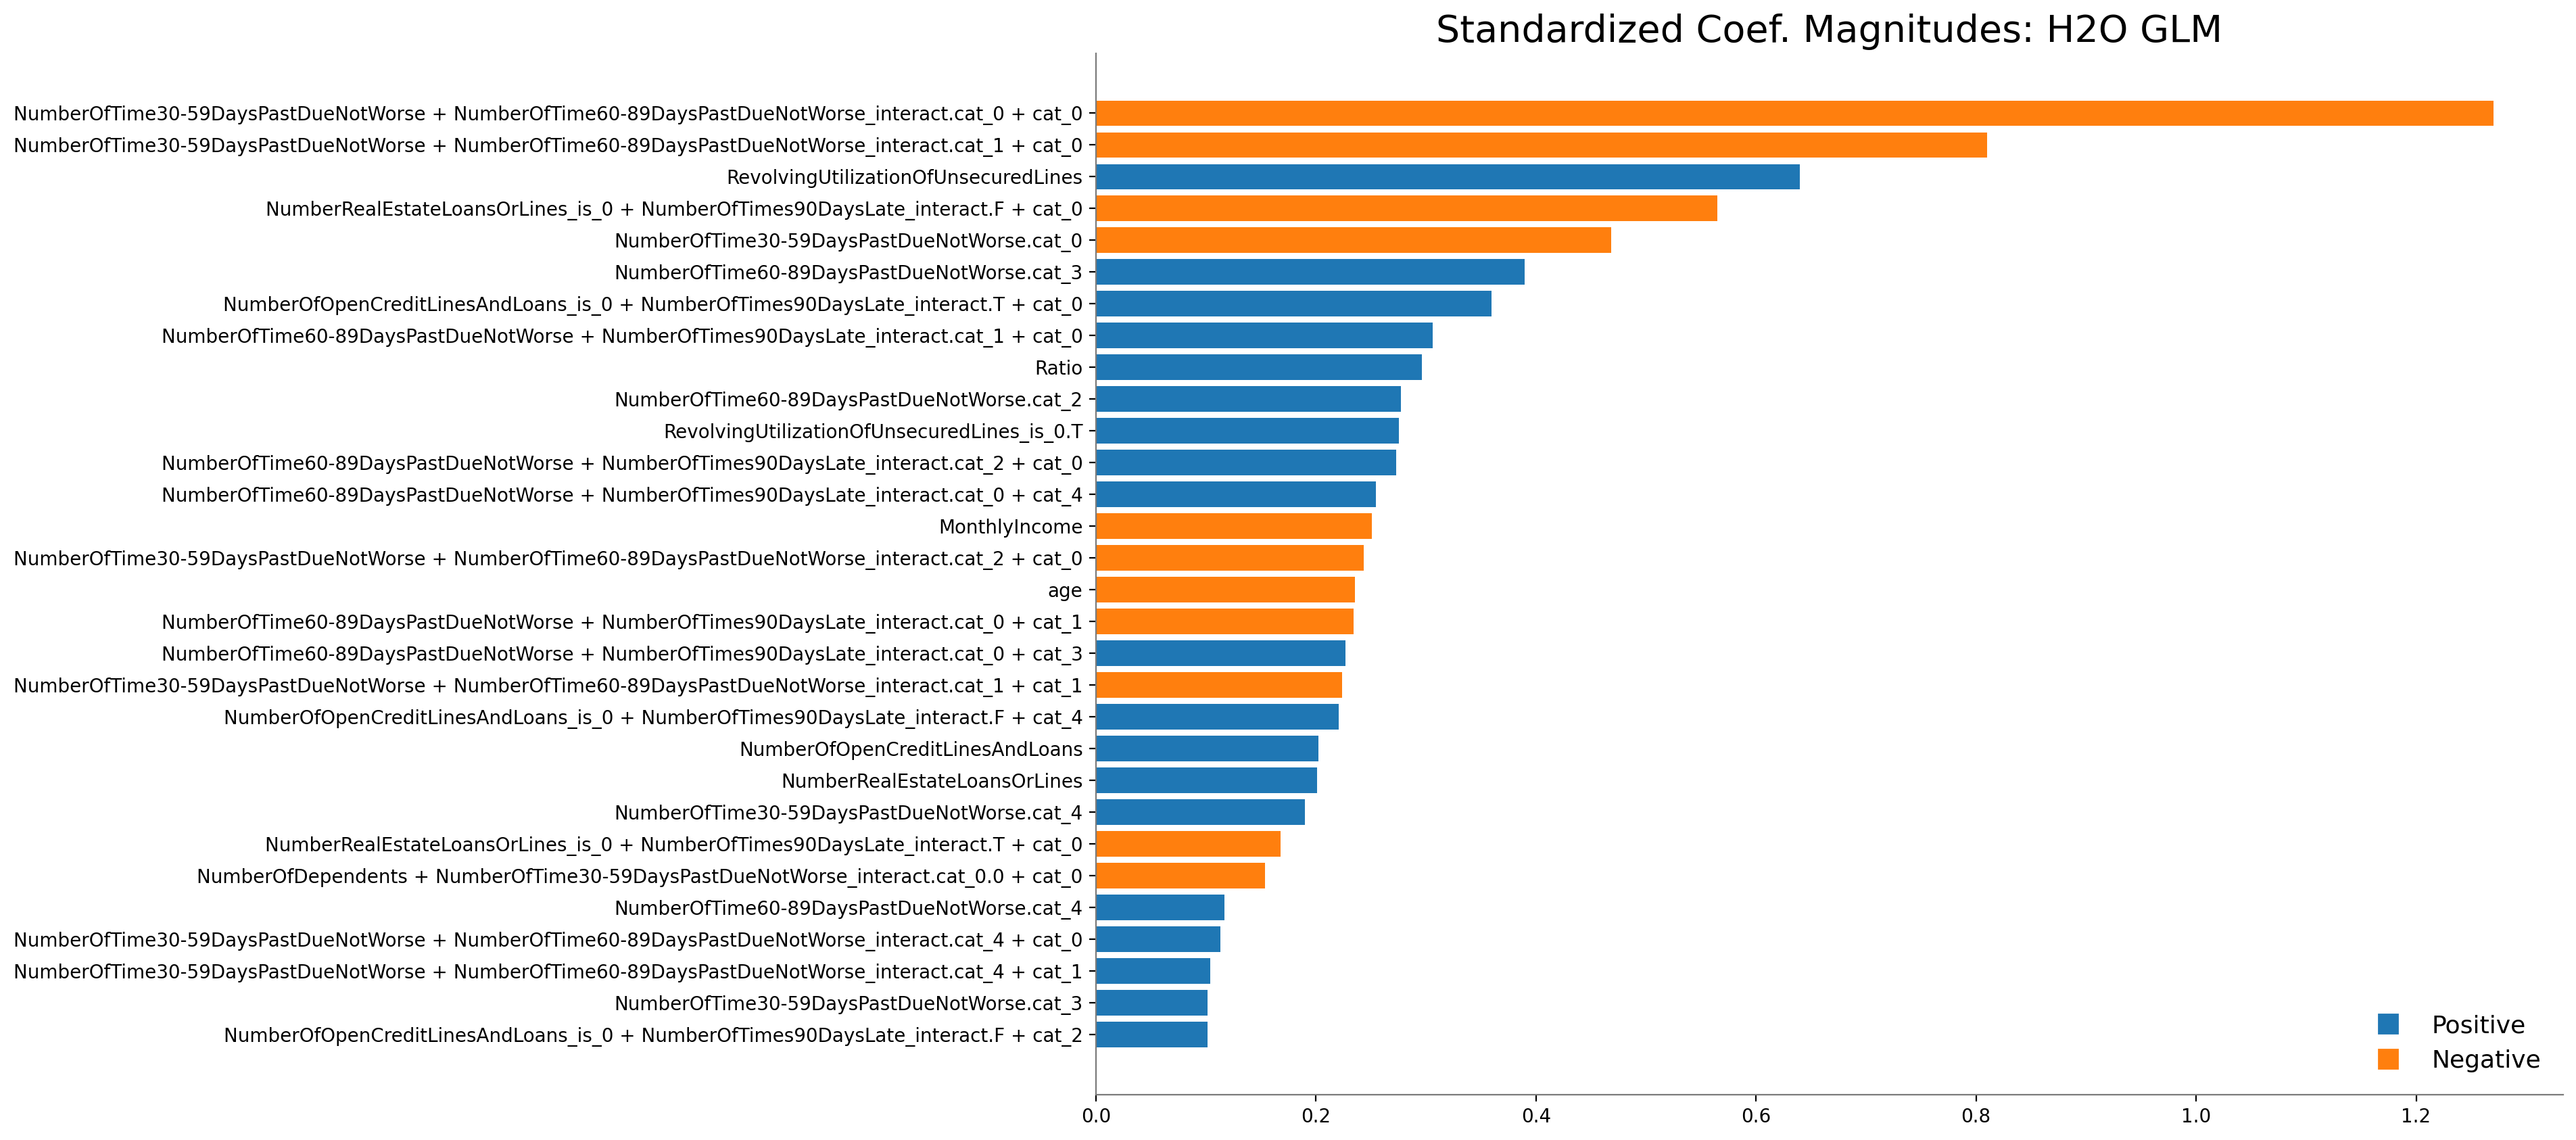

In [10]:
# строим график значений стандартизированных 
# коэффициентов
model.std_coef_plot(num_of_features=30);

In [11]:
# чтобы вычислить p-значения коэффициентов, нужно 
# задать параметр compute_p_values, отключить 
# регуляризацию (lambda_ = 0), задать метод наименьших 
# квадратов с итеративным пересчётом весов (solver='IRLSM'),
# рекомендуется задать параметр remove_collinear_columns

# создаем экземпляр класса H2OGeneralizedLinearEstimator
model2 = H2OGeneralizedLinearEstimator(lambda_=0, 
                                       family='binomial', 
                                       solver='IRLSM',
                                       remove_collinear_columns=True,
                                       compute_p_values=True)
# обучаем модель
model2.train(predictors, 
             dependent, 
             training_frame=h2o_train,
             validation_frame=h2o_test)

# отключаем экспоненциальное представление
pd.set_option('display.float_format', lambda x: '%.5f' % x)

# записываем таблицу коэффициентов
coeff_table2 = model2._model_json['output']['coefficients_table']
coeff_table2

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


names,coefficients,std_error,z_value,p_value,standardized_coefficients
Intercept,-4.0803622,0.0798748,-51.0844676,0.0,-3.8965594
NumberOfDependents + NumberOfTime30-59DaysPastDueNotWorse_interact.cat_0.0 + cat_1,2.5833955,0.5391747,4.7913889,0.0000017,2.5833955
NumberOfDependents + NumberOfTime30-59DaysPastDueNotWorse_interact.cat_0.0 + cat_2,2.8242039,0.6290113,4.4899100,0.0000071,2.8242039
NumberOfDependents + NumberOfTime30-59DaysPastDueNotWorse_interact.cat_0.0 + cat_3,2.2786817,0.6467771,3.5231332,0.0004265,2.2786817
NumberOfDependents + NumberOfTime30-59DaysPastDueNotWorse_interact.cat_0.0 + cat_4,2.2090140,0.1308052,16.8878103,0.0000000,2.2090140
NumberOfDependents + NumberOfTime30-59DaysPastDueNotWorse_interact.cat_1.0 + cat_0,0.1301639,0.0498284,2.6122447,0.0089950,0.1301639
NumberOfDependents + NumberOfTime30-59DaysPastDueNotWorse_interact.cat_1.0 + cat_1,2.5159624,0.5421627,4.6406036,0.0000035,2.5159624
NumberOfDependents + NumberOfTime30-59DaysPastDueNotWorse_interact.cat_1.0 + cat_2,2.6729418,0.6368251,4.1972932,0.0000270,2.6729418
NumberOfDependents + NumberOfTime30-59DaysPastDueNotWorse_interact.cat_1.0 + cat_3,2.4244382,0.6543417,3.7051565,0.0002113,2.4244382
NumberOfDependents + NumberOfTime30-59DaysPastDueNotWorse_interact.cat_1.0 + cat_4,2.1488053,0.1695849,12.6709685,0.0000000,2.1488053


In [12]:
# преобразуем таблицу коэффициентов в датафрейм pandas
coeff_table2 = coeff_table2.as_data_frame()
coeff_table2

,names,coefficients,std_error,z_value,p_value,standardized_coefficients
0,Intercept,-4.08036,0.07987,-51.08447,0.00000,-3.89656
1,NumberOfDependents + NumberOfTime30-59DaysPastDueNotWorse_interact.cat_0.0 + cat_1,2.58340,0.53917,4.79139,0.00000,2.58340
2,NumberOfDependents + NumberOfTime30-59DaysPastDueNotWorse_interact.cat_0.0 + cat_2,2.82420,0.62901,4.48991,0.00001,2.82420
3,NumberOfDependents + NumberOfTime30-59DaysPastDueNotWorse_interact.cat_0.0 + cat_3,2.27868,0.64678,3.52313,0.00043,2.27868
4,NumberOfDependents + NumberOfTime30-59DaysPastDueNotWorse_interact.cat_0.0 + cat_4,2.20901,0.13081,16.88781,0.00000,2.20901
5,NumberOfDependents + NumberOfTime30-59DaysPastDueNotWorse_interact.cat_1.0 + cat_0,0.13016,0.04983,2.61224,0.00899,0.13016
6,NumberOfDependents + NumberOfTime30-59DaysPastDueNotWorse_interact.cat_1.0 + cat_1,2.51596,0.54216,4.64060,0.00000,2.51596
7,NumberOfDependents + NumberOfTime30-59DaysPastDueNotWorse_interact.cat_1.0 + cat_2,2.67294,0.63683,4.19729,0.00003,2.67294
8,NumberOfDependents + NumberOfTime30-59DaysPastDueNotWorse_interact.cat_1.0 + cat_3,2.42444,0.65434,3.70516,0.00021,2.42444
9,NumberOfDependents + NumberOfTime30-59DaysPastDueNotWorse_interact.cat_1.0 + cat_4,2.14881,0.16958,12.67097,0.00000,2.14881


In [13]:
# получим вероятности и прогнозы
# для тестовой выборки
predictions = model.predict(h2o_test)
predictions

glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


predict,p0,p1
0,0.941971,0.0580291
1,0.695542,0.304458
0,0.988391,0.0116092
0,0.86983,0.13017
1,0.136734,0.863266
0,0.979913,0.0200868
0,0.978556,0.0214437
0,0.978351,0.0216488
1,0.647701,0.352299
0,0.95786,0.0421398


In [14]:
# импортируем класс H2OGridSearch для выполнения поиска по сетке
from h2o.grid.grid_search import H2OGridSearch

# задаем сетку значени гиперпараметров, будем перебирать 
# разные значения alpha, alpha определяет тип регуляризации: 
# значение 1 соответствует l1-регуляризации (лассо), значение 0 
# соответствует l2-регуляризации (гребневой регрессии), 
# промежуточное значение соответствует 
# комбинации штрафов l1 и l2 (эластичной сети)
hyper_parameters = {'alpha': [0, 0.5, 1]}

# создаем экземпляр класса H2OGridSearch, lambda_search 
# задает перебор значений lambda - силы регуляризации
gridsearch = H2OGridSearch(
    H2OGeneralizedLinearEstimator(family='binomial', 
                                  solver='IRLSM',
                                  lambda_search=True), 
    grid_id='id',
    hyper_params=hyper_parameters)

# подгоняем модели поиска по сетке
gridsearch.train(predictors,
                 dependent, 
                 training_frame=h2o_train, 
                 nfolds=5, 
                 keep_cross_validation_predictions=True, 
                 seed=1000000);

glm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%


/Users/artemgruzdev/anaconda3/lib/python3.10/site-packages/h2o/job.py:83: UserWarning: Reached maximum number of iterations 45!
  warnings.warn(w)
/Users/artemgruzdev/anaconda3/lib/python3.10/site-packages/h2o/job.py:83: UserWarning: Reached maximum number of iterations 126!
  warnings.warn(w)
/Users/artemgruzdev/anaconda3/lib/python3.10/site-packages/h2o/job.py:83: UserWarning: Reached maximum number of iterations 117!
  warnings.warn(w)
/Users/artemgruzdev/anaconda3/lib/python3.10/site-packages/h2o/grid/grid_search.py:431: UserWarning: Adding alpha array to hyperparameter runs slower with gridsearch. This is due to the fact that the algo has to run initialization for every alpha value. Setting the alpha array as a model parameter will skip the initialization and run faster overall.
  warnings.warn(w_message)


In [15]:
# выводим результаты поиска по сетке
gridsearch.show()

,alpha,model_ids,logloss
,0.0,id_model_1,0.1808097
,1.0,id_model_3,0.1808220
,0.5,id_model_2,0.1808352


In [16]:
# сортируем результаты поиска по сетке
# по убывания AUC
gridperf = gridsearch.get_grid(sort_by='auc', 
                               decreasing=True)
gridperf

,alpha,model_ids,auc
,1.0,id_model_3,0.8612017
,0.5,id_model_2,0.8611734
,0.0,id_model_1,0.8611676


In [17]:
# извлекаем наилучшую модель
best_model = gridperf.models[0]
best_model

Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: id_model_3


GLM Model: summary
    family    link    regularization              lambda_search                                                                      number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  ------  --------------------------  ---------------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  ------------------------------------------------------
    binomial  logit   Lasso (lambda = 2.879E-5 )  nlambda = 100, lambda.max = 0.07131, lambda.min = 2.879E-5, lambda.1se = 4.275E-4  128                           75                             115                     Key_Frame__upload_acff67a9a285c8813c71c884c0974068.hex

ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.04955845952726534
RMSE: 0.2226172938638536
LogLoss: 0.1802279126013964
AUC: 0.861863120193548
AUCPR: 0.3879648709290698
Gini: 0.7237262403870961
Null degrees of freedom: 104999
Residual degrees of freedom: 104924
Null deviance: 51530.262138337675
Residual deviance: 37847.86164629324
AIC: 37999.86164629324

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.18428151959208705
       0      1     Error    Rate
-----  -----  ----  -------  -----------------
0      92055  5927  0.0605   (5927.0/97982.0)
1      3395   3623  0.4838   (3395.0/7018.0)
Total  95450  9550  0.0888   (9322.0/105000.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.184282     0.437349  212
max f2                       0.0913395    0.520976  269
max f0point5                 0.393049     0.451114  129
max accuracy                 0.518853     0.937476  87
max precision                0.916891     0.764706  5
max recall                   0.000883746  1         399
max specificity              0.998996     0.99999   0
max absolute_mcc             0.184282     0.39584   212
max min_per_class_accuracy   0.0578848    0.782274  303
max mean_per_class_accuracy  0.0625652    0.783303  297
max tns                      0.998996     97981     0
max fns                      0.998996     7018      0
max fps                      0.000883746  97982     399
max tps                      0.000883746  7018      399
max tnr                      0.998996     0.99999   0
max fnr                      0.998996     1         0
max fpr                      0.000883746  1         399
max tpr                      0.000883746  1         399

Gains/Lift Table: Avg response rate:  6,68 %, avg score:  6,68 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain       cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  ---------  -----------------  --------------------
1        0.01                        0.62472            9.56113    9.56113            0.639048         0.717764    0.639048                    0.717764            0.0956113       0.0956113                  856.113    856.113            0.0917432
2        0.02                        0.519221           8.64919    9.10516            0.578095         0.569557    0.608571                    0.64366             0.0864919       0.182103                   764.919    810.516            0.173714
3        0.03                        0.436352           6.44058    8.21697            0.430476         0.475481    0.549206                    0.587601            0.0644058       

In [18]:
# смотрим AUC наилучшей модели
# на тестовой выборке
bestmodel_perf = best_model.model_performance(h2o_test)
print(bestmodel_perf.auc())

0.8615915363691361


In [19]:
# смотрим оптимальные значения lambda_ и alpha
best_model.summary()['regularization']

['Lasso (lambda = 2.879E-5 )']

In [20]:
# считываем исторические данные в датафрейм pandas
fulldata = pd.read_csv('Data/cs-training.csv', 
                       index_col='Unnamed: 0')

In [21]:
# пишем функцию предварительной подготовки
def preprocessing(df):
    
    # значения переменной age меньше 18 заменяем
    # минимально допустимым значением возраста
    df['age'] = np.where(df['age'] < 18, 18, df['age'])
    
    # создаем переменную Ratio - отношение количества 
    # просрочек 90+ к общему количеству просрочек
    sum_of_delinq = (df['NumberOfTimes90DaysLate'] + 
                     df['NumberOfTime30-59DaysPastDueNotWorse'] + 
                     df['NumberOfTime60-89DaysPastDueNotWorse'])

    cond = (df['NumberOfTimes90DaysLate'] == 0) | (sum_of_delinq == 0)
    df['Ratio'] = np.where(
        cond, 0, df['NumberOfTimes90DaysLate'] / sum_of_delinq)
    
    # создаем индикатор нулевых значений переменной 
    # NumberOfOpenCreditLinesAndLoans
    df['NumberOfOpenCreditLinesAndLoans_is_0'] = np.where(
        df['NumberOfOpenCreditLinesAndLoans'] == 0, 'T', 'F')
    
    # создаем индикатор нулевых значений переменной 
    # NumberRealEstateLoansOrLines
    df['NumberRealEstateLoansOrLines_is_0'] = np.where(
        df['NumberRealEstateLoansOrLines'] == 0, 'T', 'F')
    
    # создаем индикатор нулевых значений переменной 
    # RevolvingUtilizationOfUnsecuredLines
    df['RevolvingUtilizationOfUnsecuredLines_is_0'] = np.where(
        df['RevolvingUtilizationOfUnsecuredLines'] == 0, 'T', 'F')
    
    # преобразовываем переменные в категориальные, применив
    # биннинг и перевод в единый строковый формат
    for col in ['NumberOfTime30-59DaysPastDueNotWorse', 
                'NumberOfTime60-89DaysPastDueNotWorse',
                'NumberOfTimes90DaysLate']:
        df.loc[df[col] > 3, col] = 4
        df[col] = df[col].apply(lambda x: f"cat_{x}")
        
    # создаем список списков - список 2-факторных взаимодействий
    lst = [
        ['NumberOfDependents', 
         'NumberOfTime30-59DaysPastDueNotWorse'],
        ['NumberOfTime60-89DaysPastDueNotWorse', 
         'NumberOfTimes90DaysLate'],
        ['NumberOfTime30-59DaysPastDueNotWorse', 
         'NumberOfTime60-89DaysPastDueNotWorse'],
        ['NumberRealEstateLoansOrLines_is_0', 
         'NumberOfTimes90DaysLate'],
        ['NumberOfOpenCreditLinesAndLoans_is_0', 
         'NumberOfTimes90DaysLate']
    ]
    
    # создаем взаимодействия
    for i in lst:
        f1 = i[0]
        f2 = i[1]
        df[f1 + ' + ' + f2 + '_interact'] = (df[f1].astype(str) + ' + ' 
                                             + df[f2].astype(str))   
    return df

In [22]:
# применяем нашу функцию ко всем историческим данным
preprocessing(fulldata)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Ratio,NumberOfOpenCreditLinesAndLoans_is_0,NumberRealEstateLoansOrLines_is_0,RevolvingUtilizationOfUnsecuredLines_is_0,NumberOfDependents + NumberOfTime30-59DaysPastDueNotWorse_interact,NumberOfTime60-89DaysPastDueNotWorse + NumberOfTimes90DaysLate_interact,NumberOfTime30-59DaysPastDueNotWorse + NumberOfTime60-89DaysPastDueNotWorse_interact,NumberRealEstateLoansOrLines_is_0 + NumberOfTimes90DaysLate_interact,NumberOfOpenCreditLinesAndLoans_is_0 + NumberOfTimes90DaysLate_interact
1,1,0.76613,45,cat_2,0.80298,9120.00000,13,cat_0,6,cat_0,2.00000,0.00000,F,F,F,2.0 + cat_2,cat_0 + cat_0,cat_2 + cat_0,F + cat_0,F + cat_0
2,0,0.95715,40,cat_0,0.12188,2600.00000,4,cat_0,0,cat_0,1.00000,0.00000,F,T,F,1.0 + cat_0,cat_0 + cat_0,cat_0 + cat_0,T + cat_0,F + cat_0
3,0,0.65818,38,cat_1,0.08511,3042.00000,2,cat_1,0,cat_0,0.00000,0.50000,F,T,F,0.0 + cat_1,cat_0 + cat_1,cat_1 + cat_0,T + cat_1,F + cat_1
4,0,0.23381,30,cat_0,0.03605,3300.00000,5,cat_0,0,cat_0,0.00000,0.00000,F,T,F,0.0 + cat_0,cat_0 + cat_0,cat_0 + cat_0,T + cat_0,F + cat_0
5,0,0.90724,49,cat_1,0.02493,63588.00000,7,cat_0,1,cat_0,0.00000,0.00000,F,F,F,0.0 + cat_1,cat_0 + cat_0,cat_1 + cat_0,F + cat_0,F + cat_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,0,0.04067,74,cat_0,0.22513,2100.00000,4,cat_0,1,cat_0,0.00000,0.00000,F,F,F,0.0 + cat_0,cat_0 + cat_0,cat_0 + cat_0,F + cat_0,F + cat_0
149997,0,0.29975,44,cat_0,0.71656,5584.00000,4,cat_0,1,cat_0,2.00000,0.00000,F,F,F,2.0 + cat_0,cat_0 + cat_0,cat_0 + cat_0,F + cat_0,F + cat_0
149998,0,0.24604,58,cat_0,3870.00000,NaN,18,cat_0,1,cat_0,0.00000,0.00000,F,F,F,0.0 + cat_0,cat_0 + cat_0,cat_0 + cat_0,F + cat_0,F + cat_0
149999,0,0.00000,30,cat_0,0.00000,5716.00000,4,cat_0,0,cat_0,0.00000,0.00000,F,T,T,0.0 + cat_0,cat_0 + cat_0,cat_0 + cat_0,T + cat_0,F + cat_0


In [23]:
# преобразовываем датафрейм pandas со всеми 
# историческими данными во фрейм h2o
h2o_fulldata = h2o.H2OFrame(fulldata, column_types=dct)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [24]:
# взглянем на наш фрейм
h2o_fulldata.describe()

Rows:150000
Cols:20

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Ratio,NumberOfOpenCreditLinesAndLoans_is_0,NumberRealEstateLoansOrLines_is_0,RevolvingUtilizationOfUnsecuredLines_is_0,NumberOfDependents + NumberOfTime30-59DaysPastDueNotWorse_interact,NumberOfTime60-89DaysPastDueNotWorse + NumberOfTimes90DaysLate_interact,NumberOfTime30-59DaysPastDueNotWorse + NumberOfTime60-89DaysPastDueNotWorse_interact,NumberRealEstateLoansOrLines_is_0 + NumberOfTimes90DaysLate_interact,NumberOfOpenCreditLinesAndLoans_is_0 + NumberOfTimes90DaysLate_interact
type,enum,real,int,enum,real,int,int,enum,int,enum,int,real,enum,enum,enum,enum,enum,enum,enum,enum
mins,,0.0,18.0,,0.0,0.0,0.0,,0.0,,0.0,0.0,,,,,,,,
mean,,6.04843805466687,52.2953266666666,,353.00507576386866,6670.221237392837,8.45275999999997,,1.0182400000000027,,0.7572222678605646,0.03617429292605687,,,,,,,,
maxs,,50708.0,109.0,,329664.0,3008750.0,58.0,,54.0,,20.0,1.0,,,,,,,,
sigma,,249.75537062544075,14.771514145278267,,2037.818523144368,14384.674215282112,5.145950989643271,,1.1297709848828603,,1.11508607148714,0.16554299977968837,,,,,,,,
zeros,,10878,0,,4113,1634,1888,,56188,,86902,141662,,,,,,,,
missing,0,0,0,0,0,29731,0,0,0,0,3924,0,0,0,0,0,0,0,0,0
0,1,0.766126609,45.0,cat_2,0.802982129,9120.0,13.0,cat_0,6.0,cat_0,2.0,0.0,F,F,F,2.0 + cat_2,cat_0 + cat_0,cat_2 + cat_0,F + cat_0,F + cat_0
1,0,0.957151019,40.0,cat_0,0.121876201,2600.0,4.0,cat_0,0.0,cat_0,1.0,0.0,F,T,F,1.0 + cat_0,cat_0 + cat_0,cat_0 + cat_0,T + cat_0,F + cat_0
2,0,0.65818014,38.0,cat_1,0.085113375,3042.0,2.0,cat_1,0.0,cat_0,0.0,0.5,F,T,F,0.0 + cat_1,cat_0 + cat_1,cat_1 + cat_0,T + cat_1,F + cat_1


In [25]:
# создаем и обучаем модель на всех исторических данных
full_model = H2OGeneralizedLinearEstimator(family='binomial', 
                                           solver='IRLSM', 
                                           model_id='logreg', 
                                           alpha=0.5, 
                                           lambda_=6.935E-5)
full_model.train(predictors, 
                 dependent, 
                 training_frame=h2o_fulldata);

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


In [26]:
# сохраняем модель в папку
path_name = ('/Users/artemgruzdev/Documents/'
             'GitHub/Logistic_Regression/code/flask_deployment')
h2o.save_model(full_model, 
               path=path_name, 
               force=True)

'/Users/artemgruzdev/Documents/GitHub/Logistic_Regression/code/flask_deployment/logreg'

In [27]:
# загружаем новые данные в датафрейм pandas
newdata = pd.read_csv('Data/cs-test.csv', 
                      index_col='Unnamed: 0')
# записываем идентификатор набора новых данных
ident = newdata.index

In [28]:
# применяем нашу функцию к новым данным
preprocessing(newdata)

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Ratio,NumberOfOpenCreditLinesAndLoans_is_0,NumberRealEstateLoansOrLines_is_0,RevolvingUtilizationOfUnsecuredLines_is_0,NumberOfDependents + NumberOfTime30-59DaysPastDueNotWorse_interact,NumberOfTime60-89DaysPastDueNotWorse + NumberOfTimes90DaysLate_interact,NumberOfTime30-59DaysPastDueNotWorse + NumberOfTime60-89DaysPastDueNotWorse_interact,NumberRealEstateLoansOrLines_is_0 + NumberOfTimes90DaysLate_interact,NumberOfOpenCreditLinesAndLoans_is_0 + NumberOfTimes90DaysLate_interact
Unnamed: 0,,,,,,,,,,,,,,,,,,,
1,0.88552,43,cat_0,0.17751,5700.00000,4,cat_0,0,cat_0,0.00000,0.00000,F,T,F,0.0 + cat_0,cat_0 + cat_0,cat_0 + cat_0,T + cat_0,F + cat_0
2,0.46330,57,cat_0,0.52724,9141.00000,15,cat_0,4,cat_0,2.00000,0.00000,F,F,F,2.0 + cat_0,cat_0 + cat_0,cat_0 + cat_0,F + cat_0,F + cat_0
3,0.04328,59,cat_0,0.68765,5083.00000,12,cat_0,1,cat_0,2.00000,0.00000,F,F,F,2.0 + cat_0,cat_0 + cat_0,cat_0 + cat_0,F + cat_0,F + cat_0
4,0.28031,38,cat_1,0.92596,3200.00000,7,cat_0,2,cat_0,0.00000,0.00000,F,F,F,0.0 + cat_1,cat_0 + cat_0,cat_1 + cat_0,F + cat_0,F + cat_0
5,1.00000,27,cat_0,0.01992,3865.00000,4,cat_0,0,cat_0,1.00000,0.00000,F,T,F,1.0 + cat_0,cat_0 + cat_0,cat_0 + cat_0,T + cat_0,F + cat_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101499,0.28265,24,cat_0,0.06852,1400.00000,5,cat_0,0,cat_0,0.00000,0.00000,F,T,F,0.0 + cat_0,cat_0 + cat_0,cat_0 + cat_0,T + cat_0,F + cat_0
101500,0.92216,36,cat_3,0.93422,7615.00000,8,cat_0,2,cat_0,4.00000,0.00000,F,F,F,4.0 + cat_3,cat_0 + cat_0,cat_3 + cat_0,F + cat_0,F + cat_0
101501,0.08160,70,cat_0,836.00000,NaN,3,cat_0,0,cat_0,NaN,0.00000,F,T,F,nan + cat_0,cat_0 + cat_0,cat_0 + cat_0,T + cat_0,F + cat_0


In [29]:
# преобразовываем датафрейм pandas c новыми
# данными во фрейм h2o
h2o_newdata = h2o.H2OFrame(newdata)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [30]:
# взглянем на наш фрейм
h2o_newdata.describe()

Rows:101503
Cols:19

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Ratio,NumberOfOpenCreditLinesAndLoans_is_0,NumberRealEstateLoansOrLines_is_0,RevolvingUtilizationOfUnsecuredLines_is_0,NumberOfDependents + NumberOfTime30-59DaysPastDueNotWorse_interact,NumberOfTime60-89DaysPastDueNotWorse + NumberOfTimes90DaysLate_interact,NumberOfTime30-59DaysPastDueNotWorse + NumberOfTime60-89DaysPastDueNotWorse_interact,NumberRealEstateLoansOrLines_is_0 + NumberOfTimes90DaysLate_interact,NumberOfOpenCreditLinesAndLoans_is_0 + NumberOfTimes90DaysLate_interact
type,real,int,enum,real,int,int,enum,int,enum,int,real,enum,enum,enum,enum,enum,enum,enum,enum
mins,0.0,21.0,,0.0,0.0,0.0,,0.0,,0.0,0.0,,,,,,,,
mean,5.310000296784988,52.40543629252333,,344.4750202382508,6855.035589680592,8.45351368925057,,1.0130735052165956,,0.7690463909706007,0.03729215108865061,,,,,,,,
maxs,21821.0,104.0,,268326.0,7727000.0,85.0,,37.0,,43.0,1.0,,,,,,,,
sigma,196.1560386496597,14.779756224905798,,1632.5952312454388,36508.60037459905,5.144100337649389,,1.110253093831178,,1.1367781167282565,0.16880473714393168,,,,,,,,
zeros,7311,0,,2775,1020,1250,,38066,,58618,95785,,,,,,,,
missing,0,0,0,0,20103,0,0,0,0,2626,0,0,0,0,0,0,0,0,0
0,0.88551908,43.0,cat_0,0.177512717,5700.0,4.0,cat_0,0.0,cat_0,0.0,0.0,F,T,F,0.0 + cat_0,cat_0 + cat_0,cat_0 + cat_0,T + cat_0,F + cat_0
1,0.463295269,57.0,cat_0,0.527236928,9141.0,15.0,cat_0,4.0,cat_0,2.0,0.0,F,F,F,2.0 + cat_0,cat_0 + cat_0,cat_0 + cat_0,F + cat_0,F + cat_0
2,0.0432750359999999,59.0,cat_0,0.687647522,5083.0,12.0,cat_0,1.0,cat_0,2.0,0.0,F,F,F,2.0 + cat_0,cat_0 + cat_0,cat_0 + cat_0,F + cat_0,F + cat_0


In [31]:
# вычисляем вероятности классов для новых данных
predictions = full_model.predict(h2o_newdata)
predictions

glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


/Users/artemgruzdev/anaconda3/lib/python3.10/site-packages/h2o/job.py:83: UserWarning: Test/Validation dataset column 'NumberOfDependents + NumberOfTime30-59DaysPastDueNotWorse_interact' has levels not trained on: ["20.0 + cat_0", "43.0 + cat_0", "9.0 + cat_1"]
  warnings.warn(w)


predict,p0,p1
0,0.967863,0.0321368
0,0.961128,0.0388725
0,0.976899,0.0231012
0,0.878945,0.121055
0,0.942684,0.0573155
0,0.973908,0.0260919
0,0.959669,0.040331
0,0.956964,0.043036
0,0.986436,0.0135638
1,0.323242,0.676758


In [32]:
# как вариант, можно выгрузить ранее сохраненную
# модель и применить к новым данным
model_path_name = ('/Users/artemgruzdev/Documents/GitHub/'
                   'Logistic_Regression/code/flask_deployment/logreg')
savedmodel = h2o.load_model(path=model_path_name)
predictions2 = savedmodel.predict(h2o_newdata)
predictions2

glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


predict,p0,p1
0,0.967863,0.0321368
0,0.961128,0.0388725
0,0.976899,0.0231012
0,0.878945,0.121055
0,0.942684,0.0573155
0,0.973908,0.0260919
0,0.959669,0.040331
0,0.956964,0.043036
0,0.986436,0.0135638
1,0.323242,0.676758


In [33]:
# завершаем работу с h2o
h2o.cluster().shutdown()

H2O session _sid_ae08 closed.
